# **IS THE MUSHROOM POISONOUS? 🍄**

## Importing all the libraries that we are gonna use here

In [17]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Reading dataset

In [3]:
data = pd.read_csv("mushrooms.csv")

## Performing EDA

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Graphs Metrics

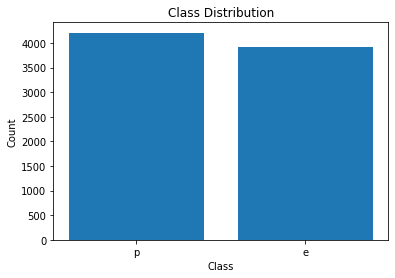

In [6]:
# Plot a bar chart to visualize the class distribution

plt.bar(data['class'].unique(), data['class'].value_counts())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

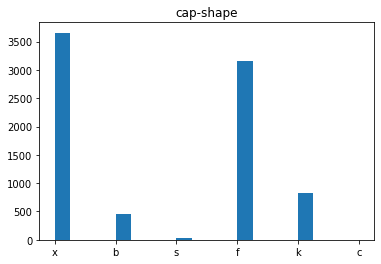

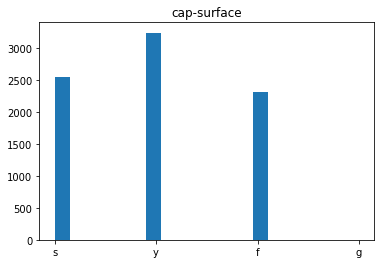

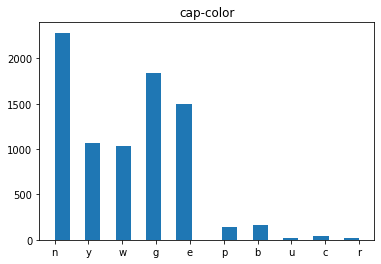

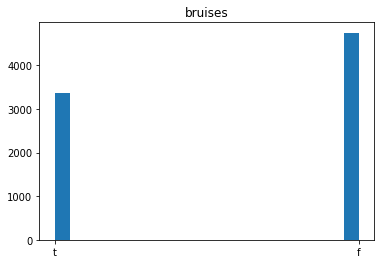

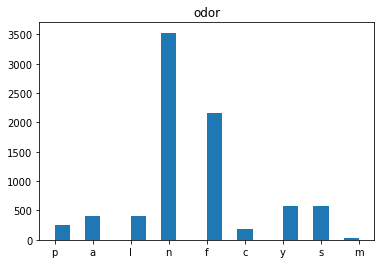

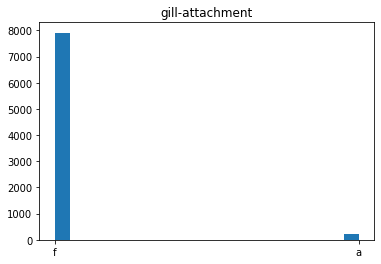

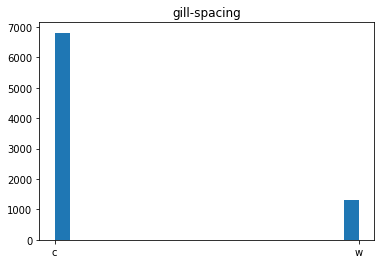

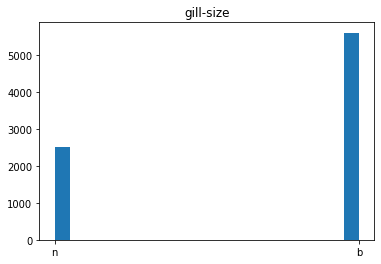

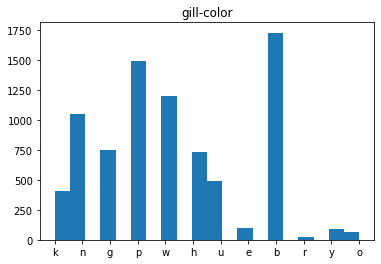

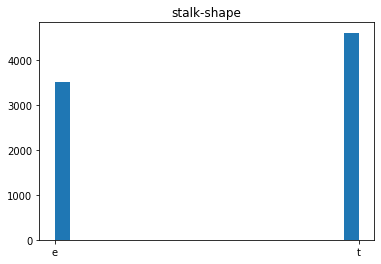

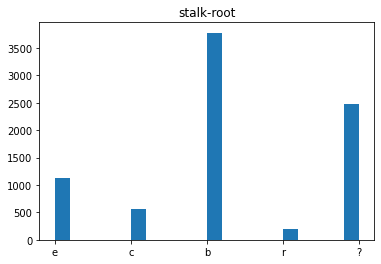

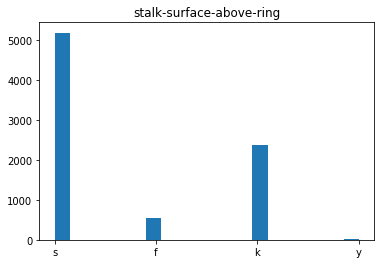

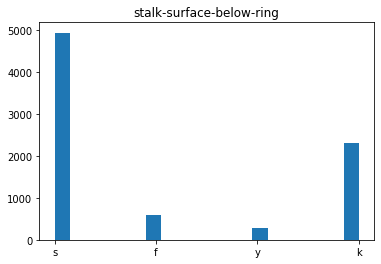

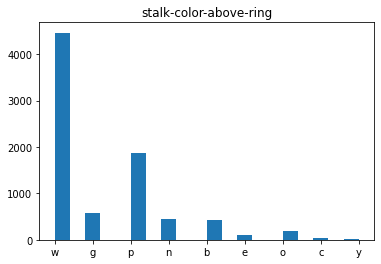

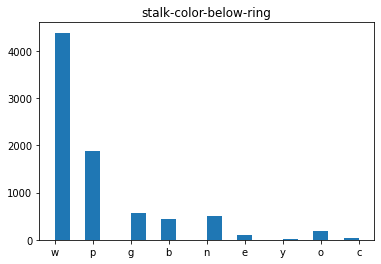

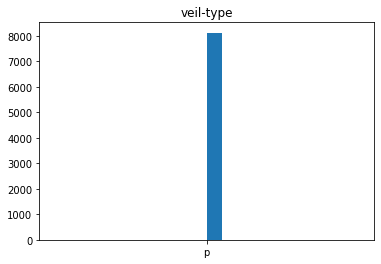

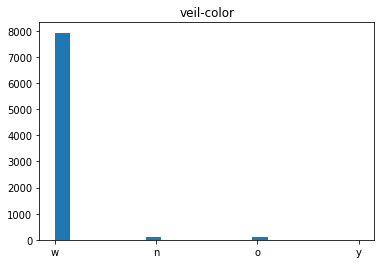

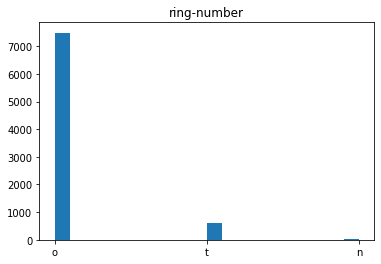

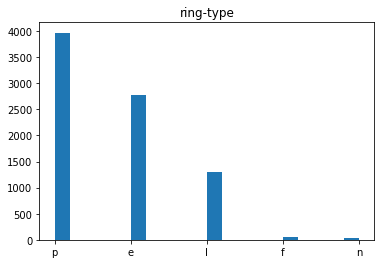

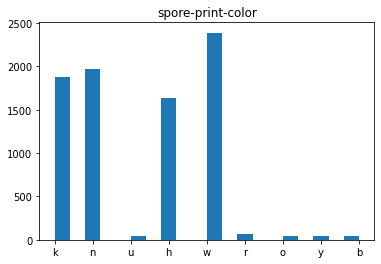

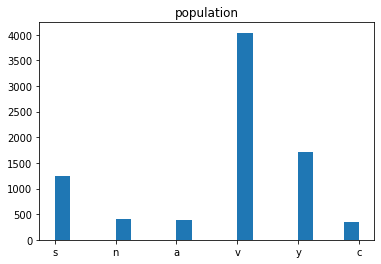

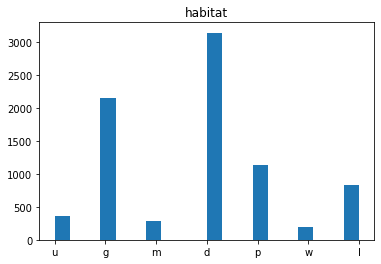

In [7]:
# Plot histograms to visualize the distribution of each feature

for feature in data.columns[1:]:
    plt.hist(data[feature], bins=20)
    plt.title(feature)
    plt.show()

In [18]:
# Mushroom Class

labels = ['Edible', 'Poisonous']
values = [data.describe()['class']['freq'], data.describe()['class']['count']-data.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

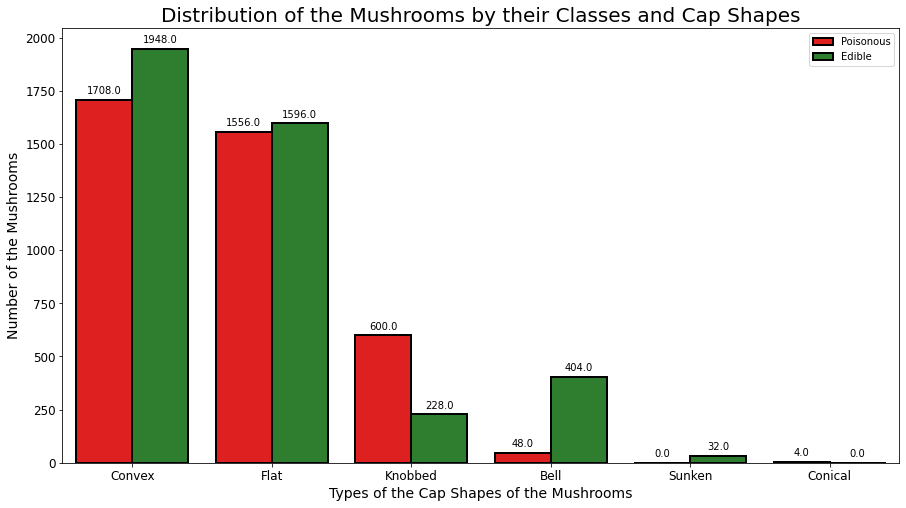

In [15]:
# Cap Shapes

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-shape',
                      hue='class',
                      order=data['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

### CONVERTING THE COLUMNS WHICH ARE IN OBJECT DATATYPES INTO INT64 DATATYPE.

In [ ]:
data["cap-shape"] = pd.factorize(data["cap-shape"])[0]
data["cap-surface"] = pd.factorize(data["cap-surface"])[0]
data["cap-color"] = pd.factorize(data["cap-color"])[0]
data["bruises"] = pd.factorize(data["bruises"])[0]
data["odor"] = pd.factorize(data["odor"])[0]
data["gill-attachment"] = pd.factorize(data["gill-attachment"])[0]
data["gill-spacing"] = pd.factorize(data["gill-spacing"])[0]
data["gill-size"] = pd.factorize(data["gill-size"])[0]
data["gill-color"] = pd.factorize(data["gill-color"])[0]
data["stalk-shape"] = pd.factorize(data["stalk-shape"])[0]
data["stalk-root"] = pd.factorize(data["stalk-root"])[0]
data["stalk-surface-above-ring"] = pd.factorize(data["stalk-surface-above-ring"])[0]
data["stalk-surface-below-ring"] = pd.factorize(data["stalk-surface-below-ring"])[0]
data["stalk-color-above-ring"] = pd.factorize(data["stalk-color-above-ring"])[0]
data["stalk-color-below-ring"] = pd.factorize(data["stalk-color-below-ring"])[0]
data["veil-type"] = pd.factorize(data["veil-type"])[0]                
data["veil-color"] = pd.factorize(data["veil-color"])[0]              
data["ring-number"] = pd.factorize(data["ring-number"])[0]             
data["ring-type"] = pd.factorize(data["ring-type"])[0]                
data["spore-print-color"] = pd.factorize(data["spore-print-color"])[0]        
data["population"] = pd.factorize(data["population"])[0]               
data["habitat"] = pd.factorize(data["habitat"])[0]                  

In [ ]:
data.info()

In [ ]:
### CHECKING IF THIS DATASET CONTAINS ANY NULL VALUES OR NOT?

In [ ]:
data.isnull().sum()

In [ ]:
data["class"].value_counts()

In [ ]:
### NOW, SAVING THE INPUT FEATURES IN A VARIABLE NAMED - "X" AND THE TARGET FEATURE IN A VARIABLE NAMED - "Y".

In [ ]:
X = data.drop("class",axis=1)
Y = data["class"]

## TRAINING AND TESTING DATASET.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=45)

## MODELING, TRAINING & PREDICTING

### 1. Logistic Regression Classifier

In [ ]:
log_model = LogisticRegression(solver='lbfgs', max_iter=100)
log_model.fit(X_train,Y_train)

In [ ]:
log_pred = log_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,log_pred))

In [ ]:
log_f1 = f1_score(Y_test,log_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", log_f1)

log_rec = recall_score(Y_test,log_pred,average="binary", pos_label="e")
print("Recall Score is: ", log_rec)

log_acc = accuracy_score(Y_test,log_pred)
print("Accuracy is: ", log_acc)

### 2. Gaussian Naive Bayes Classifier

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)

In [ ]:
nb_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,nb_pred))

In [ ]:
nb_f1 = f1_score(Y_test,nb_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", nb_f1)

nb_rec = recall_score(Y_test,nb_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", nb_rec)

nb_acc = accuracy_score(Y_test,nb_pred)
print("Accuracy is: ", nb_acc)

### 3. K Nearest Neighbors Classifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,Y_train)

In [ ]:
knn_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,knn_pred))

In [ ]:
knn_f1 = f1_score(Y_test,knn_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", knn_f1)

knn_rec = recall_score(Y_test,knn_pred,average="binary", pos_label="e")
print("Recall Score is: ", knn_rec)

knn_acc = accuracy_score(Y_test,knn_pred)
print("Accuracy is: ", knn_acc)

### 4. Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,dt_pred))

In [ ]:
dt_f1 = f1_score(Y_test,dt_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", dt_f1)

dt_rec = recall_score(Y_test,dt_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", dt_rec)

dt_acc = accuracy_score(Y_test,dt_pred)
print("Accuracy is: ", dt_acc)

### 5. Random Forest Classifier 

In [ ]:
rf_model = RandomForestClassifier(max_depth=5)
rf_model.fit(X_train,Y_train)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,rf_pred))

In [ ]:
rf_f1 = f1_score(Y_test,rf_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", rf_f1)

rf_rec = recall_score(Y_test,rf_pred,average="binary", pos_label="e")
print("Recall Score is: ", rf_rec)

rf_acc = accuracy_score(Y_test,rf_pred)
print("Accuracy is: ", rf_acc)

### 5. Support Vector Machines

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,Y_train)

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,svc_pred))

In [ ]:
svc_f1 = f1_score(Y_test,svc_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", svc_f1)

svc_rec = recall_score(Y_test,svc_pred,average="binary", pos_label="e")
print("Macro F1 Score is: ", svc_rec)

svc_acc = accuracy_score(Y_test,svc_pred)
print("Accuracy is: ", svc_acc)

## Outcomes

In [ ]:
f1_results=[log_f1,nb_f1,knn_f1,dt_f1,rf_f1,svc_f1]
recall_results=[log_rec,nb_rec,knn_rec,dt_rec,rf_rec,svc_rec]
acc_results=[log_acc,nb_acc,knn_acc,dt_acc,rf_acc,svc_acc]
index_results=['Logistic Regression', 'Naive Bayes', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
results = pd.DataFrame({'F1 Score':f1_results,'Recall Score':recall_results,'Accuracy score':acc_results},index=index_results)
results

We can choose any ML model from observing the above table, however, it would be best for us if we could test it on an outside data or have more examples to train and test on for better results.